In [30]:
import numpy as np
import pandas as pd

In [31]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


 1. Data cleaning
 2. EDA
 3. Text Preprocessing
 4. Model building
 5. Evaluation
 6. Improvement
 7. Website
 8. Deploy

#### 1. Data Cleaning

In [32]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


(5572, 5)

In [33]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
#The inplace parameter is used in pandas to specify whether a data manipulation operation should be performed on the original DataFrame or a copy of it. 

In [34]:
df.rename(columns={'v1': 'target', 'v2':'text'}, inplace='True')

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#LabelEncoder is a utility class in scikit-learn that is commonly used for encoding categorical or nominal variables into numeric values. It assigns a unique integer to each unique value in the input data.

In [36]:
df['target'] = encoder.fit_transform(df['target'])
#Fitting the encoder: When you call fit_transform on the LabelEncoder object, it analyzes the input data and learns the mapping between unique categorical values and their corresponding encoded integer values. The fit step essentially builds the internal representation of the encoder based on the provided data.
#Transforming the data: After fitting the encoder, the fit_transform method then applies the learned mapping to the input data. It replaces each unique categorical value with its corresponding encoded integer value.

In [37]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [39]:
#check duplicate values
d = df[df.duplicated()]
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [40]:
df.shape

(5572, 2)

#### 2.EDA = Explanatory Data Analysis

In [41]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

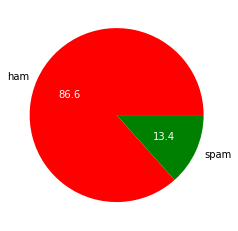

In [42]:
import matplotlib.pyplot as plt
_, _, text = plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], colors=['r', 'g'], autopct='%0.1f')
plt.setp(text, color='white')
plt.show() #to remove unwanted address text

In [43]:
#Data is imbalanced

In [44]:
import nltk #natural language toolkit
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Salem
[nltk_data]     Aslam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
df['num_char'] = df['text'].apply(len)
df

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [46]:
#num_of_words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
#nltk.word_tokenize(x) = gives words in list, we then find len

In [47]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [48]:
df[['num_words', 'num_sent']].describe() #overall

,num_words,num_sent
count,5572.000000,5572.000000
mean,18.699390,1.996411
std,13.741932,1.520159
min,1.000000,1.000000
25%,9.000000,1.000000
50%,15.000000,1.500000
75%,27.000000,2.000000
max,220.000000,38.000000


In [49]:
df[df['target']==0][['num_words', 'num_sent', 'num_char']].describe() #ham

,num_words,num_sent,num_char
count,4825.000000,4825.000000,4825.000000
mean,17.276269,1.837720,71.023627
std,13.988585,1.454388,58.016023
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,33.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,92.000000
max,220.000000,38.000000,910.000000


In [50]:
df[df['target']==1][['num_words', 'num_sent', 'num_char']].describe() #spam

,num_words,num_sent,num_char
count,747.000000,747.000000,747.000000
mean,27.891566,3.021419,138.866131
std,6.867007,1.537580,29.183082
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.500000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


In [51]:
import seaborn as sns

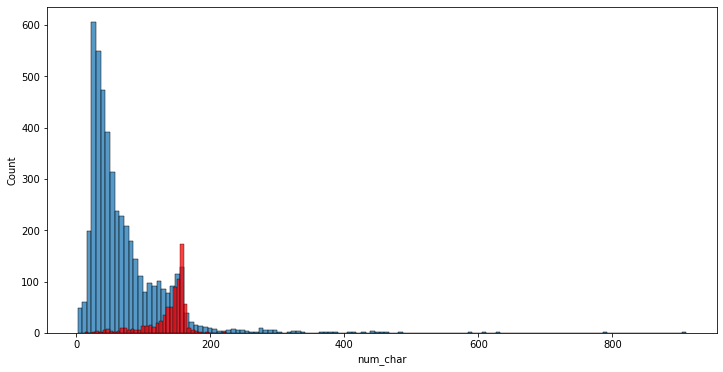

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color= 'r');

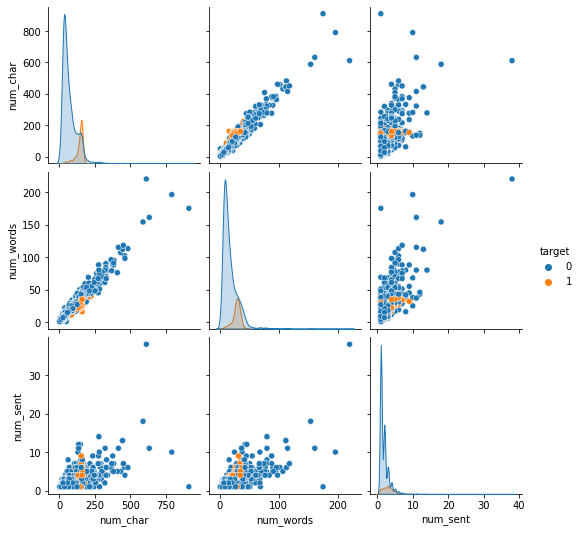

In [53]:
sns.pairplot(df, hue='target');
#diagonal are univariate distribution. In statistics, a univariate distribution is a probability distribution of only one random variable. 
#The hue parameter in sns.pairplot() allows you to specify a categorical variable to add color differentiation to the plot.

<AxesSubplot:>

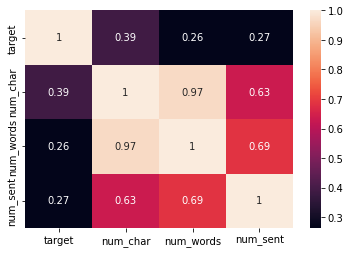

In [54]:
sns.heatmap(df.corr(), annot=True)

#### 3. Data Preprocessing

    . Lower case
    . Tokenization
    . Removing special characters
    . Removing stop words and punctuation
    . Stemming

In [55]:
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords

In [56]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Salem
[nltk_data]     Aslam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [58]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

NameError: name 'ps' is not defined

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

    spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
    wc.generate(...): This method of the WordCloud object wc generates the word cloud based on the provided text data. The text data is passed as an argument to the generate() method.

In [ ]:
text_data = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
spam_wc = wc.generate(text_data)

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

11490

c:\Users\Salem Aslam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


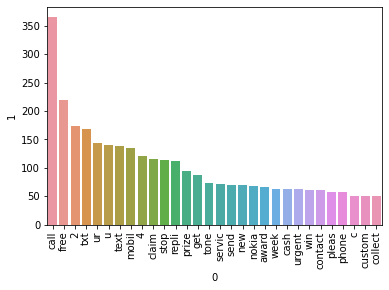

In [ ]:
from collections import Counter
#Counter(spam_corpus) = dictionary with word and number of times repeated
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical') #the text below graph rotates
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

38221

c:\Users\Salem Aslam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


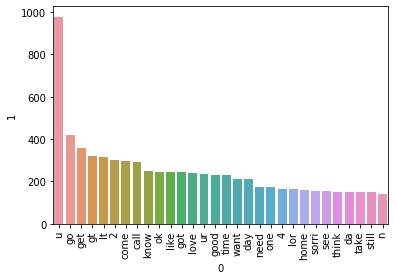

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) #top repeated 3000 words

    The code snippet you provided is importing two classes, CountVectorizer and TfidfVectorizer, from the sklearn.feature_extraction.text module.
    
    CountVectorizer is a class in scikit-learn that is used to convert a collection of text documents into a matrix of token counts. It builds a vocabulary of known words from the text and represents each document as a vector, where each element corresponds to the count of a word in the document.

    TfidfVectorizer is another class in scikit-learn that converts a collection of text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. TF-IDF is a numerical representation of the importance of a term in a document, considering both the term's frequency in the document and its rarity across all documents in the collection.

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape #5572 sms and 3000 words

(5572, 3000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

    The test_size parameter is set to 0.2, which means that 20% of the data will be allocated for testing, while the remaining 80% will be used for training.

    The random_state parameter is set to 2, which ensures reproducibility of the split. It fixes the random seed used by the random number generator, so you will get the same train-test split every time you run the code with the same random state value.

    In machine learning, the term "seed" refers to the initial state or starting point of a random number generator.

    Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced. Because of the nature of splitting the data in train and test is randomised you would get different data assigned to the train and test data unless you can control for the random factor.

    For example, imagine you have numbers: 1,2,3,4,5 and you want to select two random numbers. Without using a random_state you would get different things: i.e. first 2,5 then 3,4 and so on.
    When you control the random generator by setting the random state to 0, 1 or another number, everyone would get the same random numbers generated: i.e random_state=1 then the random numbers are 1,3 and everyone who will pick two random numbers using random_state=1 from 1,2,3,4,5 will get the same two numbers as you: 1,3.

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748878923766816
[[955   2]
 [ 26 132]]
0.9850746268656716


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9713004484304932, 0.9846153846153847)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9713004484304932
Precision -  0.9846153846153847
For  KN
Accuracy -  0.9040358744394619
Precision -  1.0
For  NB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  DT
Accuracy -  0.9246636771300448
Precision -  0.8775510204081632
For  LR
Accuracy -  0.9515695067264573
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9659192825112107
Precision -  0.9838709677419355
For  AdaBoost
Accuracy -  0.9596412556053812
Precision -  0.959349593495935
For  BgC
Accuracy -  0.95695067264574
Precision -  0.9166666666666666
For  ETC
Accuracy -  0.9713004484304932
Precision -  0.9921875
For  GBDT
Accuracy -  0.9363228699551569
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9614349775784753
Precision -  0.9831932773109243


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df
#video prefers Naive Bayes

,Algorithm,Accuracy,Precision
1,KN,0.904036,1.000000
8,ETC,0.971300,0.992188
2,NB,0.965022,0.991736
0,SVC,0.971300,0.984615
5,RF,0.965919,0.983871
10,xgb,0.961435,0.983193
4,LR,0.951570,0.964286
6,AdaBoost,0.959641,0.959350
9,GBDT,0.936323,0.930693
7,BgC,0.956951,0.916667


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904036
1,ETC,Accuracy,0.971300
2,NB,Accuracy,0.965022
3,SVC,Accuracy,0.971300
4,RF,Accuracy,0.965919
5,xgb,Accuracy,0.961435
6,LR,Accuracy,0.951570
7,AdaBoost,Accuracy,0.959641
8,GBDT,Accuracy,0.936323
9,BgC,Accuracy,0.956951


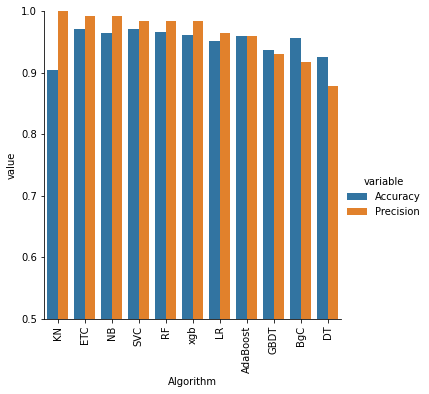

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

model improve
1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904036,1.000000,0.904036,1.000000,0.904036,1.000000,0.904036,1.000000
1,ETC,0.971300,0.992188,0.971300,0.992188,0.971300,0.992188,0.971300,0.992188
2,NB,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736
3,SVC,0.971300,0.984615,0.971300,0.984615,0.971300,0.984615,0.971300,0.984615
4,RF,0.965919,0.983871,0.965919,0.983871,0.965919,0.983871,0.965919,0.983871
5,xgb,0.961435,0.983193,0.961435,0.983193,0.961435,0.983193,0.961435,0.983193
6,LR,0.951570,0.964286,0.951570,0.964286,0.951570,0.964286,0.951570,0.964286
7,AdaBoost,0.959641,0.959350,0.959641,0.959350,0.959641,0.959350,0.959641,0.959350
8,GBDT,0.936323,0.930693,0.936323,0.930693,0.936323,0.930693,0.936323,0.930693
9,BgC,0.956951,0.916667,0.956951,0.916667,0.956951,0.916667,0.956951,0.916667


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))